# Đồ án cuối kì Khoa học dữ liệu và Ứng dụng
## Giáo viên: Lê Ngọc Thành, Hoàng Xuân Trường
### Sinh viên: 
- Huỳnh Minh Châu 1712298
- Đào Duy Tuấn 1712869

---

## Import

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

## Thu thập dữ liệu

- Dữ liệu của bạn là về chủ đề gì và bạn lấy từ nguồn
nào?
- Người ta có cho phép bạn dùng dữ liệu như này
không? Ví dụ, bạn có thể xem thử license của dữ
liệu là gì (ví dụ, với dữ liệu ở BT01, ở mục
“Overview”, bạn sẽ thấy dòng “Data has been
released under a CC 2.0 license”). Nếu bạn dùng dữ
liệu ở Kaggle và bạn chỉ dùng cho mục đích học thì
nhìn chung sẽ không có vấn đề gì; tuy nhiên, mục
đích ở đây là mình muốn bạn lưu ý đến vấn đề về
tính hợp lệ khi bạn sử dụng dữ liệu.
- Người ta thu thập dữ liệu như thế nào?

In [ ]:
company_dict = {'AAPL': 'APPLE', 'AMZN': 'AMAZON', 'FB': 'FACEBOOK', 
                'GOOGL': 'GOOGLE', 'IBM': 'IBM', 'MSFT': 'MICROSOFT', 
                'NFLX': 'NETFLIX', 'TSLA': 'TESLA'}

all_stock_df = pd.concat([pd.read_csv('/content/drive/My Drive/FinalProject/daily_adjusted_' + company + '.csv') for company in company_dict.keys()], 
                         keys=company_dict.values(), names=['Company'])

---

## Khám phá dữ liệu

Dùng cả text và code để trình bày những thông tin
sau về dữ liệu:
- Dữ liệu có bao nhiêu dòng và bao nhiêu cột?
- Mỗi dòng có ý nghĩa gì?
- Mỗi cột có ý nghĩa gì? Kiểu dữ liệu? Miền giá trị (đối
với cột dạng numeric hoặc datetime)? Các giá trị có
thể có (đối với cột dạng categorical)?
- Dữ liệu có vấn đề gì không? Ví dụ, có cột nào cần
chuyển đổi kiểu dữ liệu không, có giá trị thiếu không,
có giá trị bất thường không, ...

Số dòng, cột dữ liệu của mỗi công ty được thu thập dữ liệu.

In [ ]:
shape_df = pd.DataFrame(data=[[df.shape[0] for _, df in all_stock_df.groupby(level=0)], 
                              [df.shape[1] for _, df in all_stock_df.groupby(level=0)]], 
                        index=['row', 'col'], columns=company_dict.values())
shape_df

,APPLE,AMAZON,FACEBOOK,GOOGLE,IBM,MICROSOFT,NETFLIX,TESLA
row,5309,5309,2152,4104,5309,5309,4668,2629
col,9,9,9,9,9,9,9,9


Bảng thể hiện dòng đầu tiên trong dữ liệu của mỗi công ty.

In [ ]:
sample_df = pd.DataFrame(data=[df.iloc[0] for _, df in all_stock_df.groupby(level=[0])], 
                         index=company_dict.values(), columns=all_stock_df.columns)
sample_df

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
APPLE,2020-12-04,3198.21,3198.2100,3158.76,3162.58,3162.58,2913611,0.0,1.0
AMAZON,2020-12-04,122.60,122.8608,121.52,122.25,122.25,78260421,0.0,1.0
FACEBOOK,2020-12-04,280.30,283.4600,279.30,279.70,279.70,10880299,0.0,1.0
GOOGLE,2020-12-04,1820.22,1829.4994,1813.59,1823.76,1823.76,1027242,0.0,1.0
IBM,2020-12-04,123.97,127.3800,123.64,127.20,127.20,5522760,0.0,1.0
MICROSOFT,2020-12-04,214.22,215.3800,213.18,214.36,214.36,24666039,0.0,1.0
NETFLIX,2020-12-04,497.50,504.5000,493.64,498.31,498.31,3666243,0.0,1.0
TESLA,2020-12-04,591.01,599.0400,585.50,599.04,599.04,29401314,0.0,1.0


Mỗi dòng trong DataFrame chứa dữ liệu của mỗi công ty là dữ liệu về giá chứng khoán và các chỉ số liên quan trong một ngày.

Mỗi bảng dữ liệu đều có 9 cột, có ý nghĩa như sau:
- `timestamp`: ngày của mỗi dòng dữ liệu, có định dạng `yyyy-mm-dd`
- `open`: giá cổ phiếu ở phiên giao dịch đầu tiên trong ngày
- `high`: giá cổ phiếu cao nhất trong ngày
- `low`: giá cổ phiếu thấp trong ngày
- `close`: giá cổ phiếu ở phiên giao dịch cuối cùng trong ngày
- `adjusted_close`: tương tự như `close` và tính thêm ảnh hưởng sau khi kết thúc phiên giao dịch cuối như tách tách cổ phiếu, chia cổ tức (2 cột cuối)
- `volume`: số lượng giao dịch trong ngày
- `dividend_amount`: lượng cổ tức (lợi nhuận) công ty chi trả cho cổ động
- `split_coefficient`: tỉ lệ chia cổ phiếu (bằng 1.0 nếu không chia, ngược lại ví dụ 2.0 nghĩa là cứ 1 cổ phiếu được tách thành 2 và giá mỗi phiểu chỉ còn 1/2 ban đầu)

Kiểu dữ liệu của các cột.

In [ ]:
all_stock_df.dtypes

timestamp             object
open                 float64
high                 float64
low                  float64
close                float64
adjusted_close       float64
volume                 int64
dividend_amount      float64
split_coefficient    float64
dtype: object

Các cột hầu hết đều có kiểu dữ liệu số đúng tương ứng, nguyên cho số lượng và số thực cho giá hoặc tỉ lệ. Tuy nhiên có cột ngày tháng thì vẫn còn ở kiểu `str` cẩn được chuyển sang `datetime` để dễ xử lý.

---

## Tiền xử lý dữ liệu

In [ ]:
all_stock_df['timestamp'] = pd.to_datetime(all_stock_df['timestamp'])

---

## Tiếp tục khám phá dữ liệu

Xem miền giá trị (ngày bắt đầu và ngày kết thúc) và tỉ lệ giá `Nan` ở cột `timestamp`. Ngoài ra cũng tính tỉ lệ số ngày bị thiếu (ngày không có trong bảng dữ liệu) trong bảng dữ liệu của mỗi công ty.

In [ ]:
date_col_info_df = pd.DataFrame(columns=['nan_raito', 'missing_raito','first_date', 'last_date'], 
                             index=company_dict.values())
date_col_info_df['nan_raito'] = all_stock_df['timestamp'].isna().astype(float).mean(level=0)
date_col_info_df['first_date'] = all_stock_df['timestamp'].min(level=0)
date_col_info_df['last_date']  = all_stock_df['timestamp'].max(level=0)
date_col_info_df['missing_raito'] = ((1 - shape_df.loc['row'] / (date_col_info_df['last_date'] - date_col_info_df['first_date']).dt.days) * 100).round(2)
date_col_info_df

,nan_raito,missing_raito,first_date,last_date
APPLE,0.0,31.09,1999-11-01,2020-12-04
AMAZON,0.0,31.09,1999-11-01,2020-12-04
FACEBOOK,0.0,31.07,2012-05-18,2020-12-04
GOOGLE,0.0,31.04,2004-08-19,2020-12-04
IBM,0.0,31.09,1999-11-01,2020-12-04
MICROSOFT,0.0,31.09,1999-11-01,2020-12-04
NETFLIX,0.0,31.05,2002-05-23,2020-12-04
TESLA,0.0,31.02,2010-06-29,2020-12-04


Không có dòng dữ liệu nào bị thiếu ngày, nhưng mỗi bảng dữ liệu đều có hơn 30% số ngày không có trong dữ liệu (phần lớn số ngày thiếu này có thể là những ngày không giao dịch như ngày lễ).

Miền giá trị của các cột còn lại.

In [ ]:
num_col_info_df = all_stock_df.iloc[:, 1:].groupby(level=0).quantile([.0, .5, 1.])
num_col_info_df.index.set_levels(['min', 'median', 'max'], level=1, inplace=True)
num_col_info_df

open      high  ...  dividend_amount  split_coefficient
Company                               ...                                    
AMAZON    min        5.910     6.100  ...           0.0000           1.000000
          median   130.480   132.210  ...           0.0000           1.000000
          max     3547.000  3552.250  ...           0.0000           1.000000
APPLE     min       12.990    13.190  ...           0.0000           1.000000
          median   122.310   124.450  ...           0.0000           1.000000
          max      702.410   705.070  ...           3.2900           7.000007
FACEBOOK  min       18.080    18.270  ...           0.0000           1.000000
          median   119.990   121.225  ...           0.0000           1.000000
          max      300.160   304.670  ...           0.0000           1.000000
GOOGLE    min       99.090   101.740  ...           0.0000           1.000000
          median   601.500   607.340  ...           0.0000           1.000000
          max     1820.540  1843.830  ...         567.9717           1.000000
IBM       min       54.650    56.700  ...           0.0000           1.000000
          median   123.900   125.290  ...           0.0000           1.000000
          max      215.380   215.900  ...           1.6300           1.000000
MICROSOFT min       15.200    15.620  ...           0.0000           1.000000
          median    34.920    35.200  ...           0.0000           1.000000
          max      229.270   232.860  ...           3.0800           2.000000
NETFLIX   min        5.290     5.750  ...           0.0000           1.000000
          median    96.355    97.975  ...           0.0000           1.000000
          max      708.900   716.160  ...           0.0000           7.000007
TESLA     min       16.140    16.630  ...           0.0000           1.000000
          median   221.950   225.260  ...           0.0000           1.000000
          max     2295.120  2318.490  ...           0.0000           5.000000

[24 rows x 8 columns]

Tính tỉ lệ cái giá trị bi thiếu ở các cột numeric.

In [ ]:
all_stock_df.iloc[:, 1:].isna().sum(level=0).astype(float)

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
Company,,,,,,,,
APPLE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AMAZON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FACEBOOK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GOOGLE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IBM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MICROSOFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NETFLIX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TESLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sự kiện tách cổ phiếu 2014-06-09 https://investor.apple.com/faq/default.aspx

In [ ]:
all_stock_df.loc['APPLE'].query('20140601 < timestamp < 20140615')

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
1632,2014-06-13,92.20,92.4400,90.88,91.28,20.594226,54525000,0.0,1.000000
1633,2014-06-12,94.04,94.1200,91.90,92.29,20.822098,54749000,0.0,1.000000
1634,2014-06-11,94.13,94.7600,93.47,93.86,21.176315,45681000,0.0,1.000000
1635,2014-06-10,94.73,95.0500,93.57,94.25,21.264306,62777000,0.0,1.000000
1636,2014-06-09,92.70,93.8800,91.75,93.70,21.140217,75414997,0.0,7.000007
1637,2014-06-06,649.90,651.2600,644.47,645.57,20.807251,12497800,0.0,1.000000
1638,2014-06-05,646.20,649.3699,642.61,647.35,20.864622,10850200,0.0,1.000000
1639,2014-06-04,637.44,647.8900,636.11,644.82,20.783078,11981500,0.0,1.000000
1640,2014-06-03,628.46,638.7400,628.25,637.54,20.548438,10453900,0.0,1.000000
1641,2014-06-02,633.96,634.8300,622.50,628.65,20.261906,13191100,0.0,1.000000


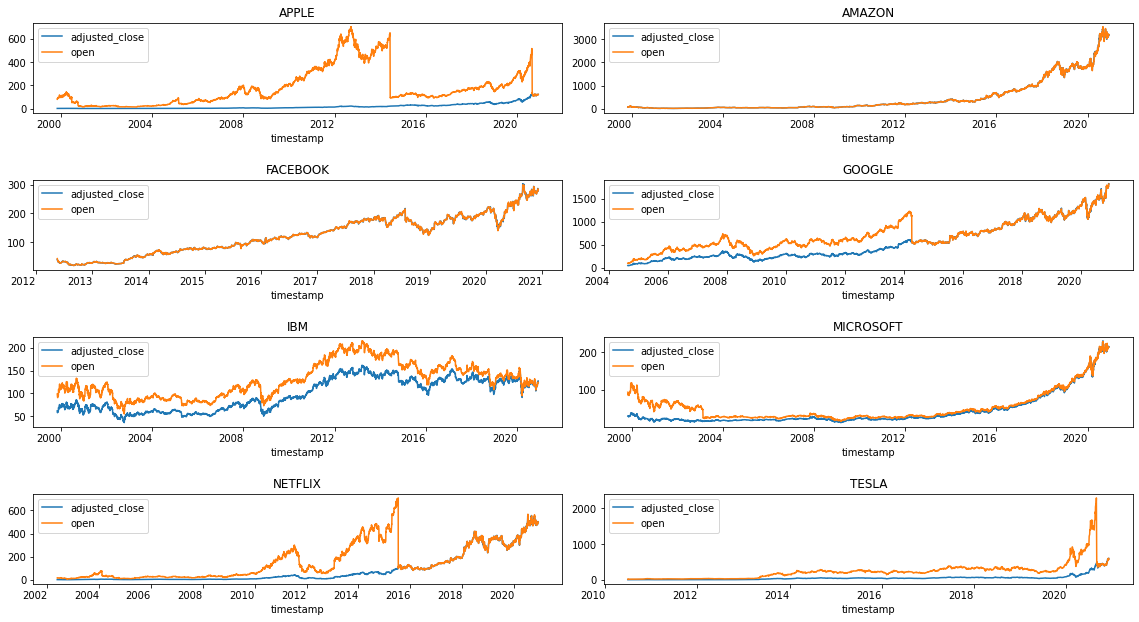

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,10))
fig.tight_layout(h_pad=6)
for i, comp in enumerate(company_dict.values()):
    all_stock_df.loc[comp].plot(x='timestamp', y=['adjusted_close', 'open'], 
                                ax=axes[i // 2, i % 2], title=comp, rot=0)

# for (year, group), ax in zip(all_stock_df.groupby(level=0), axes.flatten()):
#     group.plot(x='timestamp', y=['close', 'adjusted_close'], ax=ax, title=year, rot=0)

Giải thích sự biến động của `close`. Kết luận chọn `adjusted_close` để dự đoán.

---

## Tiền xử lý dữ liệu

---

## Câu hỏi cần trả lời

- Câu hỏi là gì? Bạn có gắng phát biểu câu hỏi cho rõ
ràng.
- Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?

Cho lịch sử giá cổ phiểu của một công ty dự đoán giá cố phiếu của công ty đó những ngày tiếp theo?

Lợi ích: tham khảo https://www.datacamp.com/community/tutorials/lstm-python-stock-market#why

---

## Phân tích - mô hình hoá dữ liệu

In [ ]:
#stock_df['close'].plot.line()

## Mo hinh ARIMA

### APPLE


In [ ]:
APPLE_df=all_stock_df.loc['APPLE']
IBM_df=all_stock_df.loc['IBM']
AMAZON_df=all_stock_df.loc['AMAZON']

In [ ]:
APPLE_df=APPLE_df.sort_values('timestamp', ignore_index=True)
APPLE_df

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,1999-11-01,80.00,80.6900,77.37,77.62,0.597773,2487300,0.0,1.0
1,1999-11-02,78.00,81.6900,77.31,80.25,0.618028,3564600,0.0,1.0
2,1999-11-03,81.62,83.2500,81.00,81.50,0.627654,2932700,0.0,1.0
3,1999-11-04,82.06,85.3700,80.62,83.62,0.643981,3384700,0.0,1.0
4,1999-11-05,84.62,88.3700,84.00,88.31,0.680100,3721500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5304,2020-11-30,116.97,120.9700,116.81,119.05,119.050000,169410176,0.0,1.0
5305,2020-12-01,121.01,123.4693,120.01,122.72,122.720000,125920963,0.0,1.0
5306,2020-12-02,122.02,123.3700,120.89,123.08,123.080000,89004195,0.0,1.0
5307,2020-12-03,123.52,123.7800,122.21,122.94,122.940000,78967630,0.0,1.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


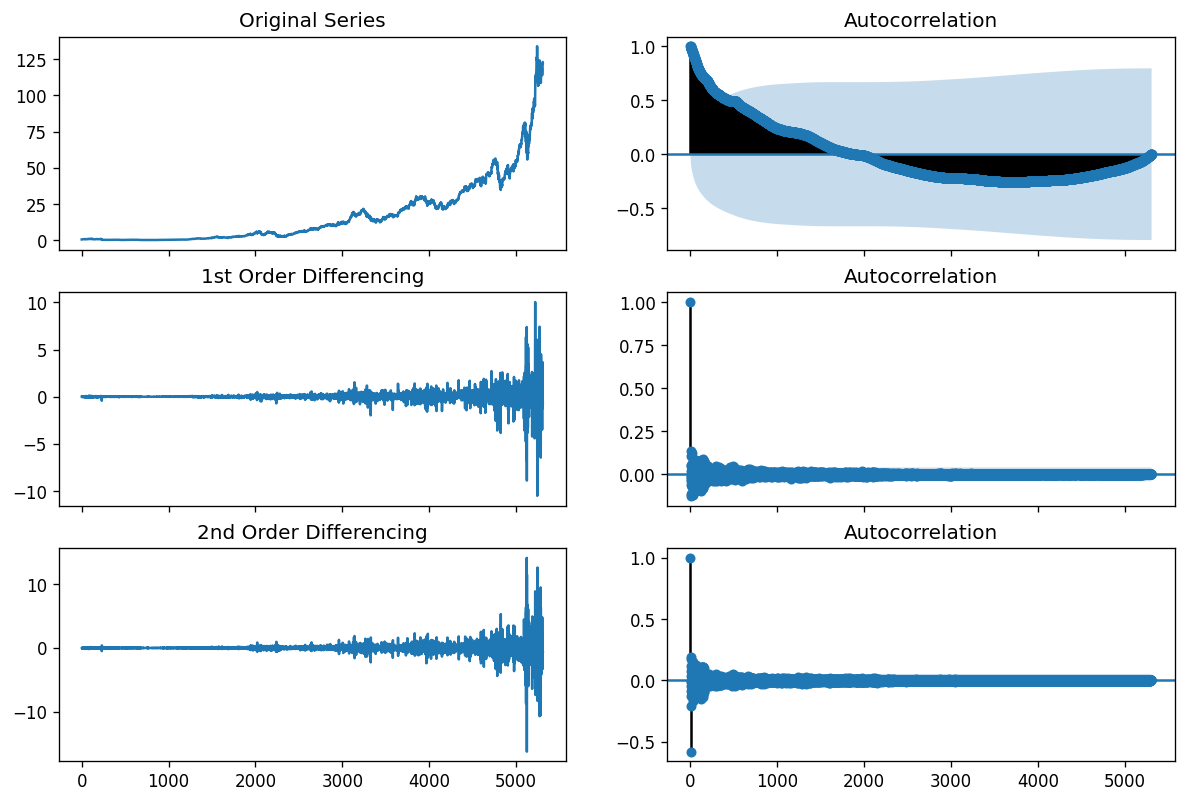

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(APPLE_df.adjusted_close.to_numpy()); axes[0, 0].set_title('Original Series')
plot_acf(APPLE_df.adjusted_close, ax=axes[0, 1],lags=5308) #Vẽ auto correlation để chọn tham số thứ 1 mà vẽ xong không thấy gì hết

# 1st Differencing
axes[1, 0].plot(APPLE_df.adjusted_close.diff().to_numpy()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(APPLE_df.adjusted_close.diff().dropna(), ax=axes[1, 1],lags=5307)

# 2nd Differencing
axes[2, 0].plot(APPLE_df.adjusted_close.diff().diff().to_numpy()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(APPLE_df.adjusted_close.diff().diff().dropna(), ax=axes[2, 1],lags=5306)

plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = APPLE_df.adjusted_close[:4512]
test = APPLE_df.adjusted_close[4512:]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# Build Model
#model = ARIMA(train, order=(7000,2,1))  
model = ARIMA(train, order=(3, 2,1))  #Tham số thứ 3 trong tutorial nói vẽ partial correlation để chọn, C chọn theo cách thử 
                                      #hình như là chỉ có 2-3 giá trị cho tham số thứ 3 thôi
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(797, alpha=0.05)  # 95% conf #ảnh hưởng vùng màu xám?

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)



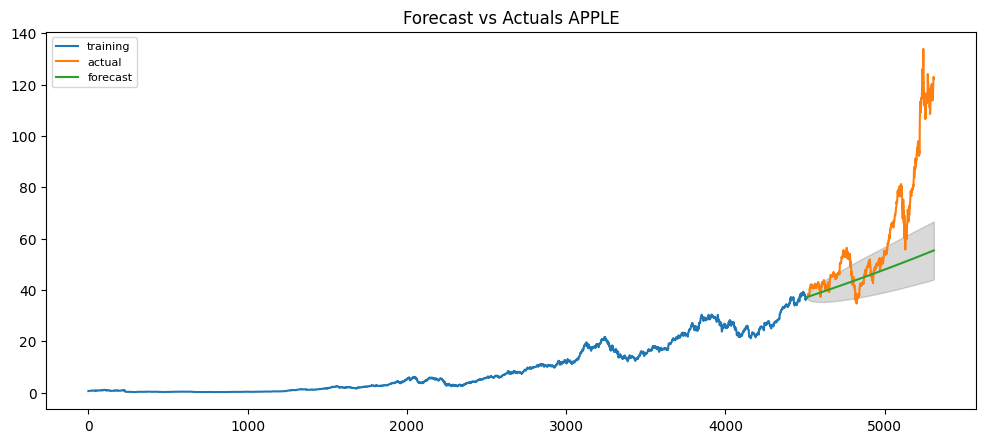

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals APPLE')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE #CÁI NÀY THƯỜNG ĐƯỢC CHỌN SỬ DỤNG
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                # ACF1
    rmspe = (np.sqrt(np.mean(np.square((actual - forecast) / actual))))  
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax,'rmspe':rmspe})

forecast_accuracy(fc, test.values)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': 0.9922552792171158,
 'corr': 0.854540748716266,
 'mae': 15.645486832146812,
 'mape': 0.19469099659271158,
 'me': -14.880089451704281,
 'minmax': 0.19358333085949186,
 'mpe': -0.17513603537366038,
 'rmse': 24.8118120095981,
 'rmspe': 0.25422008116234907}

### AMAZON

In [ ]:
AMAZON_df=AMAZON_df.sort_values('timestamp', ignore_index=True)
AMAZON_df

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,1999-11-01,68.06,71.88,66.3100,69.13,69.13,12824100,0.0,1.0
1,1999-11-02,69.75,70.00,65.0600,66.44,66.44,13243200,0.0,1.0
2,1999-11-03,68.19,68.50,65.0000,65.81,65.81,10772100,0.0,1.0
3,1999-11-04,67.19,67.19,61.0000,63.06,63.06,16759200,0.0,1.0
4,1999-11-05,64.75,65.50,62.2500,64.94,64.94,11091400,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5304,2020-11-30,3208.48,3228.39,3125.5500,3168.04,3168.04,4063916,0.0,1.0
5305,2020-12-01,3188.50,3248.95,3157.1800,3220.08,3220.08,4493554,0.0,1.0
5306,2020-12-02,3221.65,3232.00,3173.2601,3203.53,3203.53,3129304,0.0,1.0
5307,2020-12-03,3205.46,3228.64,3181.3100,3186.73,3186.73,2892039,0.0,1.0


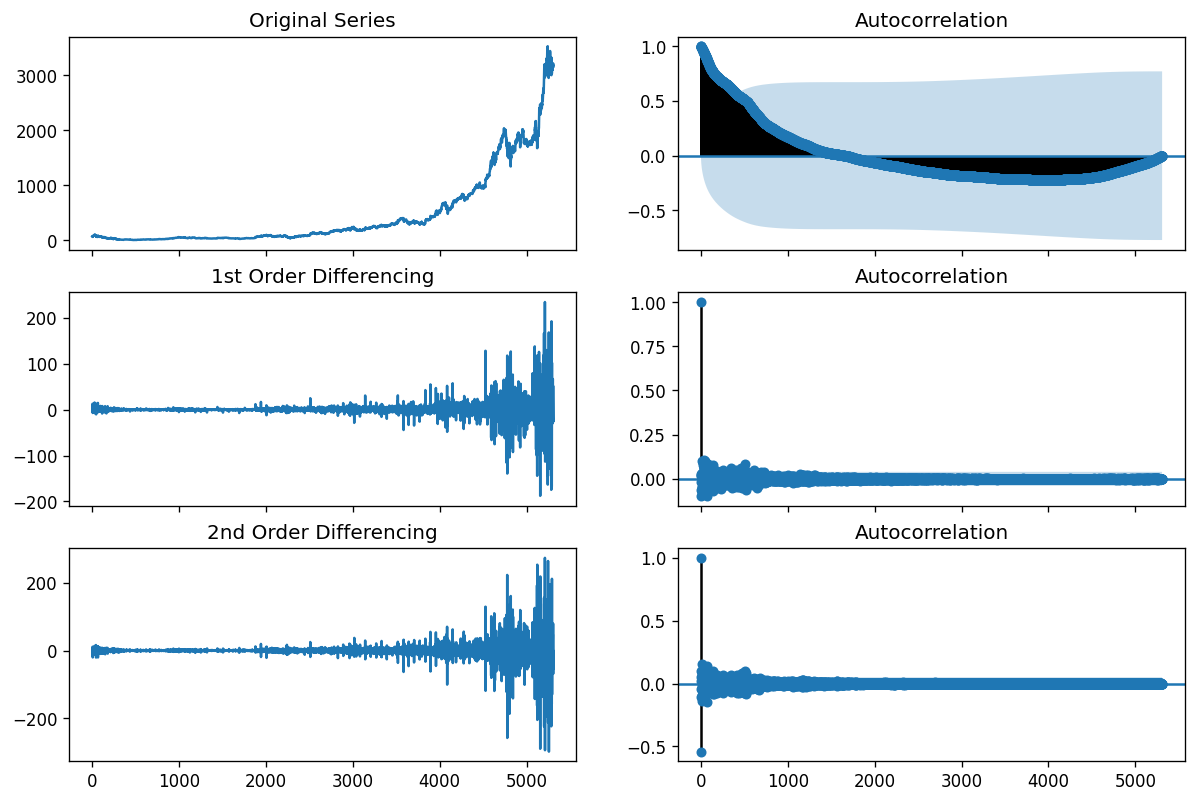

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(AMAZON_df.adjusted_close.to_numpy()); axes[0, 0].set_title('Original Series')
plot_acf(AMAZON_df.adjusted_close, ax=axes[0, 1],lags=5308)

# 1st Differencing
axes[1, 0].plot(AMAZON_df.adjusted_close.diff().to_numpy()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(AMAZON_df.adjusted_close.diff().dropna(), ax=axes[1, 1],lags=5307)

# 2nd Differencing
axes[2, 0].plot(AMAZON_df.adjusted_close.diff().diff().to_numpy()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(AMAZON_df.adjusted_close.diff().diff().dropna(), ax=axes[2, 1],lags=5306)

plt.show()

In [ ]:
# Create Training and Test
train = AMAZON_df.adjusted_close[:4512]
test = AMAZON_df.adjusted_close[4512:]


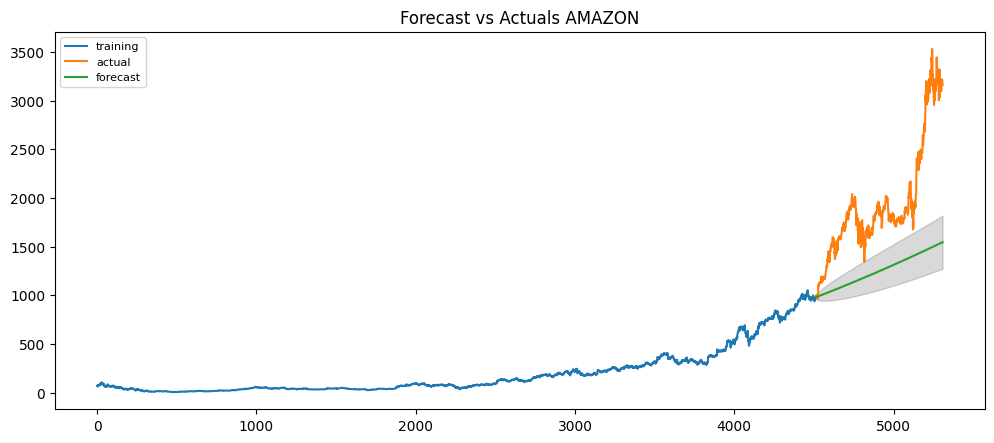

In [ ]:
# Build Model
#model = ARIMA(train, order=(7000,2,1))  
model = ARIMA(train, order=(3, 2,1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(797, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals AMAZON')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
forecast_accuracy(fc, test.values)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': 0.9911192433348197,
 'corr': 0.8536568229100577,
 'mae': 690.7853853454549,
 'mape': 0.324775077167708,
 'me': -690.6122449902908,
 'minmax': 0.32477361158043005,
 'mpe': -0.32459691685786285,
 'rmse': 822.6521924651993,
 'rmspe': 0.34424418390583705}

### IBM

In [ ]:
IBM_df=IBM_df.sort_values('timestamp', ignore_index=True)
IBM_df

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,1999-11-01,98.50,98.81,96.37,96.75,61.535122,9551800,0.0,1.0
1,1999-11-02,96.75,96.81,93.69,94.81,60.301239,11105400,0.0,1.0
2,1999-11-03,95.87,95.94,93.50,94.37,60.021389,10369100,0.0,1.0
3,1999-11-04,94.44,94.44,90.00,91.56,58.234168,16697600,0.0,1.0
4,1999-11-05,92.75,92.94,90.19,90.25,57.400979,13737600,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5304,2020-11-30,124.10,125.00,123.09,123.52,123.520000,5987991,0.0,1.0
5305,2020-12-01,123.90,125.83,123.08,123.16,123.160000,5099334,0.0,1.0
5306,2020-12-02,122.85,124.64,122.41,124.62,124.620000,3690737,0.0,1.0
5307,2020-12-03,124.16,124.86,123.29,123.61,123.610000,4548161,0.0,1.0


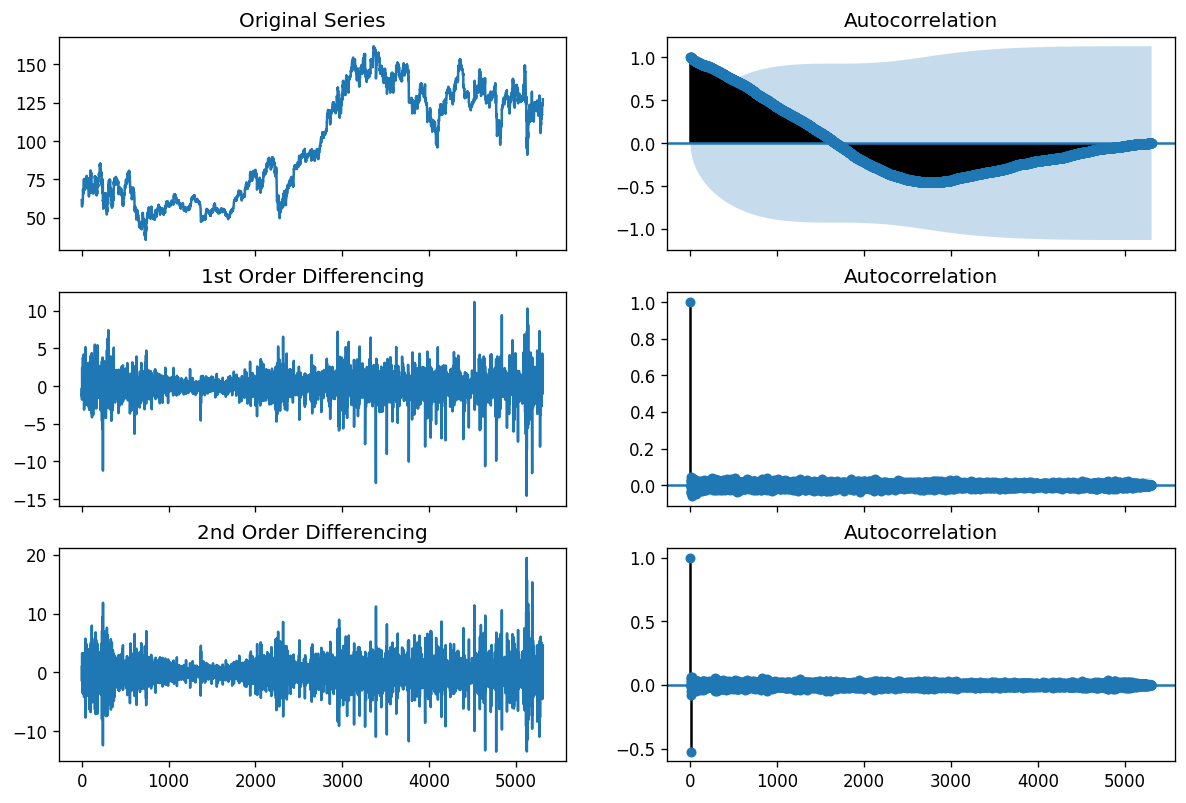

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(IBM_df.adjusted_close.to_numpy()); axes[0, 0].set_title('Original Series')
plot_acf(IBM_df.adjusted_close, ax=axes[0, 1],lags=5308)

# 1st Differencing
axes[1, 0].plot(IBM_df.adjusted_close.diff().to_numpy()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(IBM_df.adjusted_close.diff().dropna(), ax=axes[1, 1],lags=5307)

# 2nd Differencing
axes[2, 0].plot(IBM_df.adjusted_close.diff().diff().to_numpy()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(IBM_df.adjusted_close.diff().diff().dropna(), ax=axes[2, 1],lags=5306)

plt.show()

In [ ]:
# Create Training and Test
train = IBM_df.adjusted_close[:4512]
test = IBM_df.adjusted_close[4512:]


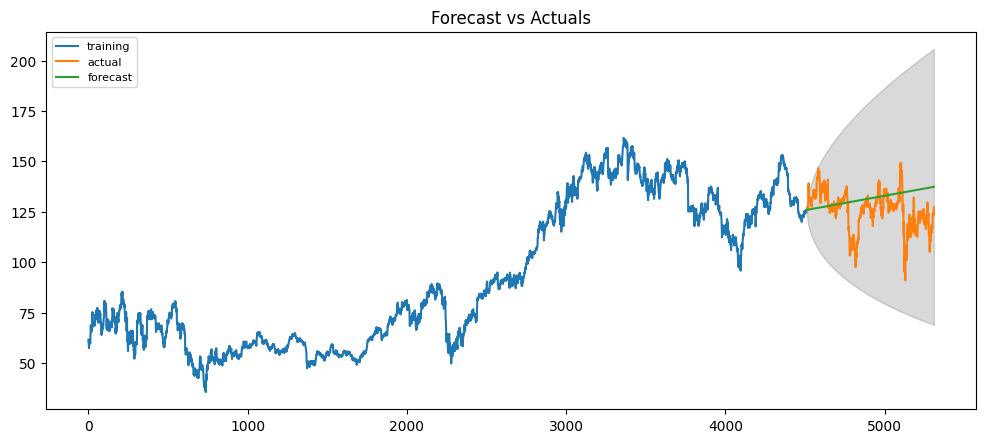

In [ ]:
# Build Model
#model = ARIMA(train, order=(7000,2,1))  
model = ARIMA(train, order=(3, 1,1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(797, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
forecast_accuracy(fc, test.values)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': 0.9797113616666518,
 'corr': -0.38465691091829524,
 'mae': 9.646912850295681,
 'mape': 0.08113207096730266,
 'me': 5.850654179239532,
 'minmax': 0.07166796893707295,
 'mpe': 0.05360847128114601,
 'rmse': 12.602928242859017,
 'rmspe': 0.11144616293666723}

## Tham khảo

Nguồn

## Xoá sau khi tổng kết lại

## Bookmark 

https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231

https://www.kaggle.com/utkukubilay/time-series-analysis-in-python

https://www.kaggle.com/kratisaxena/stock-market-technical-indicators-visualization

https://www.kaggle.com/jagangupta/time-series-basics-exploring-traditional-ts

https://www.kaggle.com/kanncaa1/time-series-prediction-tutorial-with-eda

Stock split: https://www.investopedia.com/ask/answers/what-stock-split-why-do-stocks-split/

missing date (đọc sau) https://grollchristian.wordpress.com/2014/08/13/missing-data/

bloger alphavantage: https://medium.com/alpha-vantage/why-is-the-price-of-ticker-xxx-different-1daa1871922c
- https://medium.com/alpha-vantage/start-your-artificial-intelligence-strategy-part-1-516460644c1d
- https://medium.com/alpha-vantage/adding-artificial-intelligence-to-your-investing-strategy-part-2-f409a03a2c94
- https://medium.com/@patrick.collins_58673/adding-artificial-intelligence-to-your-investing-strategy-part-3-1abe31d6d218

## Nháp

In [ ]:
# code cũ
# missing_dates = pd.Series(pd.date_range(start=stock_df.index.min(), end=stock_df.index.max()).
#                           difference(pd.to_datetime(stock_df.index)))
# missing_dates.groupby([missing_dates.dt.year, missing_dates.dt.month]).agg({'count'})
# for company in ['AAPL', 'AMZN', 'FB', 'GOOG', 'IBM', 'MSFT', 'NFLX', 'TSLA']:
#     print('Company', company)
#     stock_df = pd.read_csv('daily_adjusted_' + company + '.csv', index_col='timestamp')
#     print('Total dates:', len(stock_df))
#     print('Start date:', stock_df.index.min())
#     print('End date:', stock_df.index.max())
#     missing_dates = pd.Series(pd.date_range(start=stock_df.index.min(), end=stock_df.index.max()).
#                               difference(pd.to_datetime(stock_df.index)))
#     missing_dates_counts = missing_dates.groupby([missing_dates.dt.year, missing_dates.dt.month]).agg({'count'})
#     print('Total missing date:', len(missing_dates))
#     print('Median of missing date per month:', missing_dates_counts.median()[0])
#     print('Average of missing date per month:', missing_dates_counts.median()[0])
#     print('\n\n')